# s6508611 Final Project

## รายวิชา

ว30183 วิทยาศาสตร์ข้อมูลสำหรับการประยุกต์ใช้ในชีวิตจริง

## ประเภทของการพัฒนาชิ้นงาน

ชุดข้อมูลจากโครงงานของนักเรียน

## หัวข้อโครงงาน

การทำนายโรคหัวใจและหลอดเลือดโดยใช้การเรียนรู้ของเครื่อง

## จัดทำโดย

นายจิรภัทร นามวงศ์ ม.5/2 เลขที่ 11 เลขประจำตัว 08611

## สมมุติฐานข้อมูลผลการทดลอง

**คำถาม 1** คนที่เป็นโรคหัวใจและหลอดเลือดมีอายุเฉลี่ยมากกว่าเท่ากับ 60 ปี ที่ระดับนัยสำคัญ 0.05 หรือไม่ <br>
$H_0$ : คนที่เป็นโรคหัวใจและหลอดเลือดมีอายุเฉลี่ยมากกว่าเท่ากับ 60 ปี ที่ระดับนัยสำคัญ 0.05 <br>
$H_a$ : คนที่เป็นโรคหัวใจและหลอดเลือดมีอายุเฉลี่ยน้อยกว่า 60 ปี ที่ระดับนัยสำคัญ 0.05

**คำถาม 2** คนที่เป็นโรคหัวใจและหลอดเลือดมากกว่าร้อยละ 60 สูบบุหรี่ ที่ระดับนัยสำคัญ 0.05 หรือไม่ <br>
$H_0$ : คนที่เป็นโรคหัวใจและหลอดเลือดมากกว่าเท่ากับร้อยละ 60 สูบบุหรี่ ที่ระดับนัยสำคัญ 0.05 <br>
$H_a$ : คนที่เป็นโรคหัวใจและหลอดเลือดน้อยกว่าร้อยละ 60 สูบบุหรี่ ที่ระดับนัยสำคัญ 0.05

**คำถาม 3** คนที่เป็นโรคหัวใจและหลอดเลือดมากกว่าร้อยละ 60 เป็นผู้ชาย ที่ระดับนัยสำคัญ 0.05 หรือไม่ <br>
$H_0$ : คนที่เป็นโรคหัวใจและหลอดเลือดมากกว่าเท่ากับร้อยละ 60 เป็นผู้ชาย ที่ระดับนัยสำคัญ 0.05 <br>
$H_a$ : คนที่เป็นโรคหัวใจและหลอดเลือดน้อยกว่าร้อยละ 60 เป็นผู้ชาย ที่ระดับนัยสำคัญ 0.05

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_raw = pd.read_csv('cardio_train.csv', sep=';')
df_raw.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
df_raw.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Data description

There are 3 types of input features:

- Objective: factual information;
- Examination: results of medical examination;
- Subjective: information given by the patient.

Features:

1. Age | Objective Feature | age | int (days)
2. Height | Objective Feature | height | int (cm) |
3. Weight | Objective Feature | weight | float (kg) |
4. Gender | Objective Feature | gender | categorical code |
5. Systolic blood pressure | Examination Feature | ap_hi | int |
6. Diastolic blood pressure | Examination Feature | ap_lo | int |
7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9. Smoking | Subjective Feature | smoke | binary |
10. Alcohol intake | Subjective Feature | alco | binary |
11. Physical activity | Subjective Feature | active | binary |
12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.

## คำถาม 1 คนที่เป็นโรคหัวใจและหลอดเลือดมีอายุเฉลี่ยมากกว่าเท่ากับ 60 ปี ที่ระดับนัยสำคัญ 0.05 หรือไม่
$H_0$ : คนที่เป็นโรคหัวใจและหลอดเลือดมีอายุเฉลี่ยมากกว่าเท่ากับ 60 ปี ที่ระดับนัยสำคัญ 0.05 <br>
$H_a$ : คนที่เป็นโรคหัวใจและหลอดเลือดมีอายุเฉลี่ยน้อยกว่า 60 ปี ที่ระดับนัยสำคัญ 0.05 <br>

In [5]:
df1 = df_raw.copy()

In [6]:
df1['age_year'] = df1['age'].apply(lambda x: x/365)
df1.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.391781
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.419178
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.663014
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.282192
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.873973


In [7]:
df_age_year_cardio = df1[['cardio','age_year']]
df_age_year_cardio1 = df_age_year_cardio[df_age_year_cardio['cardio']==1]
df_age_year_cardio1.head()

,cardio,age_year
1,1,55.419178
2,1,51.663014
3,1,48.282192
7,1,61.873973
15,1,45.978082


In [8]:
df_age_year_cardio1.shape

(34979, 2)

In [9]:
mean_age_year_cardio1 = np.mean(df_age_year_cardio1['age_year'])

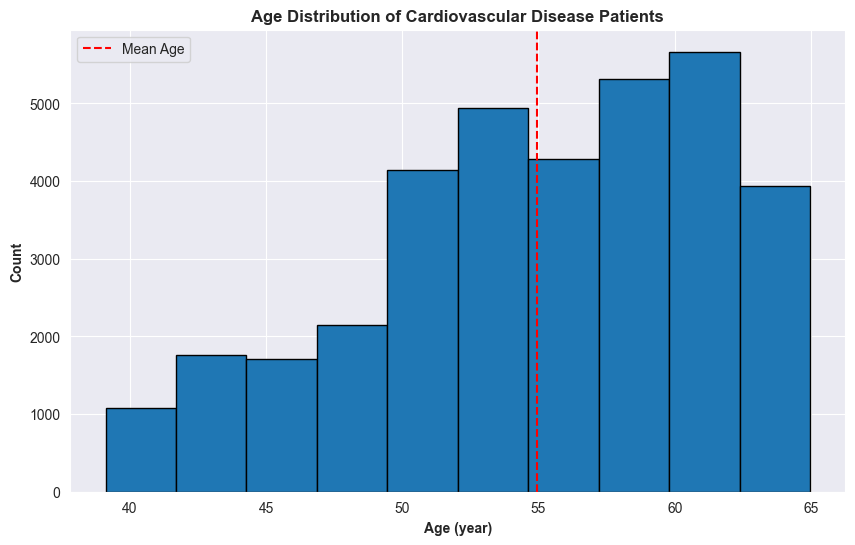

In [10]:
sns.set_style('darkgrid')

fig_q1, ax_q1 = plt.subplots(figsize=(10, 6))
sns.histplot(df_age_year_cardio1['age_year'],bins=10,alpha=1.0,linewidth=1.0,edgecolor='black')
ax_q1.axvline((mean_age_year_cardio1),color='red',linestyle='--',label='Mean Age')
ax_q1.legend()

plt.xlabel('Age (year)',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Age Distribution of Cardiovascular Disease Patients',fontweight='bold')
plt.show()

Use bootstrapping because we don't know the population distribution

In [11]:
df_age_year_cardio1_boot_distn = []

for i in range(40000):
    df_age_year_cardio1_boot_distn.append(
        np.mean(
            df_age_year_cardio1.sample(frac=1, replace=True)['age_year']
        )
    )

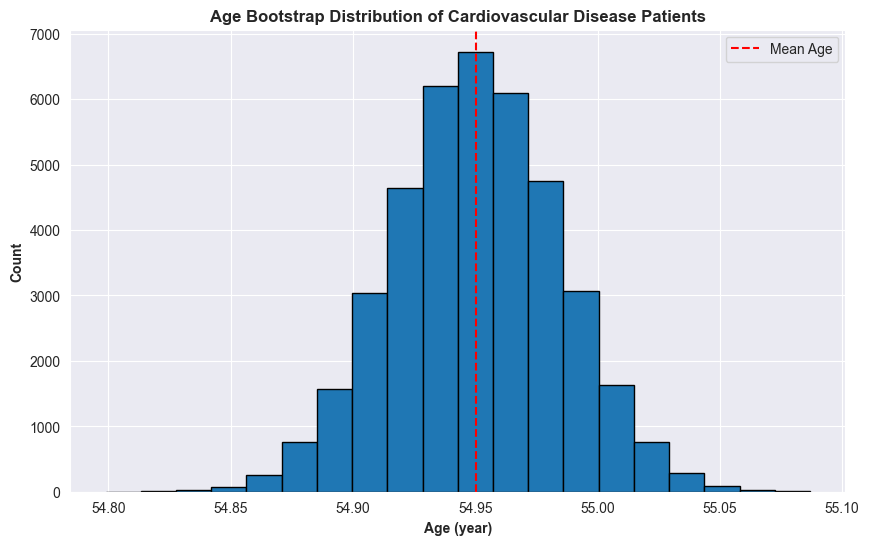

In [12]:
sns.set_style('darkgrid')

fig_q1_2, ax_q1_2 = plt.subplots(figsize=(10, 6))
sns.histplot(df_age_year_cardio1_boot_distn,bins=20,alpha=1.0,linewidth=1.0,edgecolor='black')
ax_q1_2.axvline(mean_age_year_cardio1,color='red',linestyle='--',label='Mean Age')
ax_q1_2.legend()

plt.xlabel('Age (year)',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Age Bootstrap Distribution of Cardiovascular Disease Patients',fontweight='bold')
plt.show()

One-sample test for means <br>

$Z = \dfrac{\bar{x}-\mu_0}{S/\sqrt{n}}$

In [13]:
age_year_cardio1_hyp = 60

In [14]:
std_deviation_q1 = np.std(df_age_year_cardio1_boot_distn, ddof=1)
std_deviation_q1

0.03400915906062893

In [15]:
z_score_q1 = (mean_age_year_cardio1 - age_year_cardio1_hyp)/(std_deviation_q1/np.sqrt(len(df_age_year_cardio1_boot_distn)))
z_score_q1

-29696.86668356155

**p-values:** probability of obtaining a result, assuming the null hypothesis is true

In [16]:
from scipy.stats import norm

p_value_q1 = norm.cdf(z_score_q1,loc=0,scale=1)
p_value_q1

0.0

In [17]:
alpha_q1 = 0.05

In [18]:
p_value_q1 <= alpha_q1

True

left-tailed test <br>
If $p \leq \alpha,$ we reject $H_0:$

คนที่เป็นโรคหัวใจและหลอดเลือดมีอายุเฉลี่ยน้อยกว่า 60 ปี ที่ระดับนัยสำคัญ 0.05

## คำถาม 2 คนที่เป็นโรคหัวใจและหลอดเลือดมากกว่าร้อยละ 60 สูบบุหรี่ ที่ระดับนัยสำคัญ 0.05 หรือไม่ <br>
$H_0$ : คนที่เป็นโรคหัวใจและหลอดเลือดมากกว่าเท่ากับร้อยละ 60 สูบบุหรี่ ที่ระดับนัยสำคัญ 0.05 <br>
$H_a$ : คนที่เป็นโรคหัวใจและหลอดเลือดน้อยกว่าร้อยละ 60 สูบบุหรี่ ที่ระดับนัยสำคัญ 0.05 <br>

In [19]:
df2 = df_raw.copy()
df2.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [20]:
df_smoke_cardio = df2[['smoke', 'cardio']].copy()
df_smoke_cardio.head()

,smoke,cardio
0,0,0
1,0,1
2,0,1
3,0,1
4,0,0


In [21]:
df_smoke_cardio1 = df_smoke_cardio[df_smoke_cardio['cardio'] == 1]
df_smoke_cardio1.head()

,smoke,cardio
1,0,1
2,0,1
3,0,1
7,0,1
15,0,1


In [22]:
df_smoke_cardio1.shape

(34979, 2)

so we calculate the test statistic without using the bootstrap distribution.

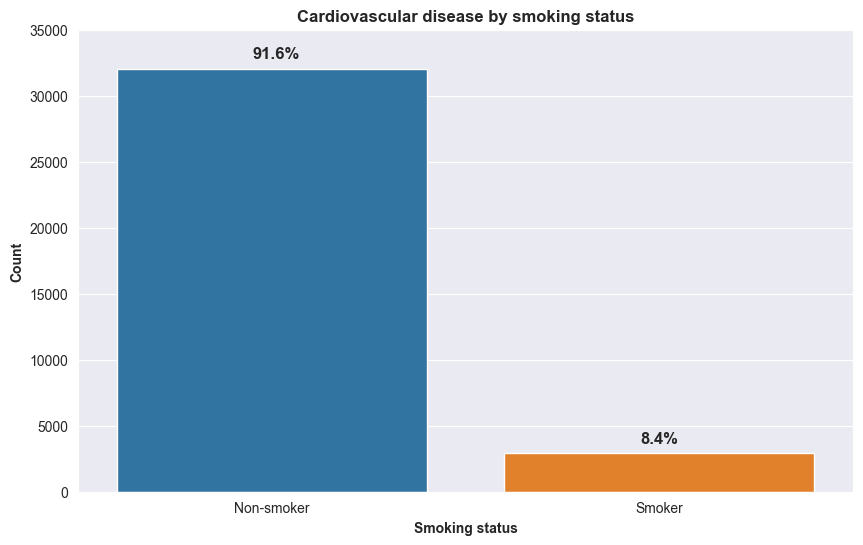

In [23]:
sns.set_style('darkgrid')

fig_q1, ax_q1 = plt.subplots(figsize=(10, 6))
sns.countplot(x='smoke',data=df_smoke_cardio1)
ax_q1.set_title('Cardiovascular disease by smoking status',fontweight='bold')
ax_q1.set_xlabel('Smoking status',fontweight='bold')
ax_q1.set_ylabel('Count',fontweight='bold')
ax_q1.set_xticklabels(['Non-smoker', 'Smoker'])
ax_q1.set_ylim(0, 35000)
for p in ax_q1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df_smoke_cardio1))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + 750
    ax_q1.annotate(percentage, (x, y), size = 12, fontweight='bold')
    
plt.show()

In [24]:
df_smoke_cardio1['smoke'].value_counts(normalize=True)

smoke
0    0.916264
1    0.083736
Name: proportion, dtype: float64

$Z=\dfrac{\hat{p}-p}{\sqrt{\frac{pq}{n}}}$

In [25]:
p_hat_q2 = (df_smoke_cardio1['smoke']==1).mean()
p_hat_q2

0.08373595585922983

In [26]:
p_0_q2 = 0.60

In [27]:
n_q2 = len(df_smoke_cardio1)
print(n_q2)

34979


In [28]:
numerator_q2 = p_hat_q2 - p_0_q2
denominator_q2 = np.sqrt(p_0_q2 * (1 - p_0_q2) / n_q2)
z_score_q2 = numerator_q2 / denominator_q2
z_score_q2

-197.0924340539197

In [29]:
p_value_q2 = norm.cdf(z_score_q2,loc=0,scale=1)
p_value_q2

0.0

In [30]:
alpha_q2 = 0.05

In [31]:
p_value_q2 <= alpha_q2

True

left-tailed test <br>
If $p \leq \alpha,$ we reject $H_0:$

คนที่เป็นโรคหัวใจและหลอดเลือดน้อยกว่าร้อยละ 60 สูบบุหรี่ ที่ระดับนัยสำคัญ 0.05

## คำถาม 3 คนที่เป็นโรคหัวใจและหลอดเลือดมากกว่าร้อยละ 60 เป็นผู้ชาย ที่ระดับนัยสำคัญ 0.05 หรือไม่ <br>
$H_0$ : คนที่เป็นโรคหัวใจและหลอดเลือดมากกว่าเท่ากับร้อยละ 60 เป็นผู้ชาย ที่ระดับนัยสำคัญ 0.05 <br>
$H_a$ : คนที่เป็นโรคหัวใจและหลอดเลือดน้อยกว่าร้อยละ 60 เป็นผู้ชาย ที่ระดับนัยสำคัญ 0.05 <br>

In [32]:
df3 = df_raw.copy()
df3.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [33]:
df_gender_cardio = df3[['gender', 'cardio']].copy()
df_gender_cardio.head()

,gender,cardio
0,2,0
1,1,1
2,1,1
3,2,1
4,1,0


In [34]:
df_gender_cardio1 = df_gender_cardio[df_gender_cardio['cardio']==1]
df_gender_cardio1.head()

,gender,cardio
1,1,1
2,1,1
3,2,1
7,2,1
15,2,1


In [35]:
df_gender_cardio1.shape

(34979, 2)

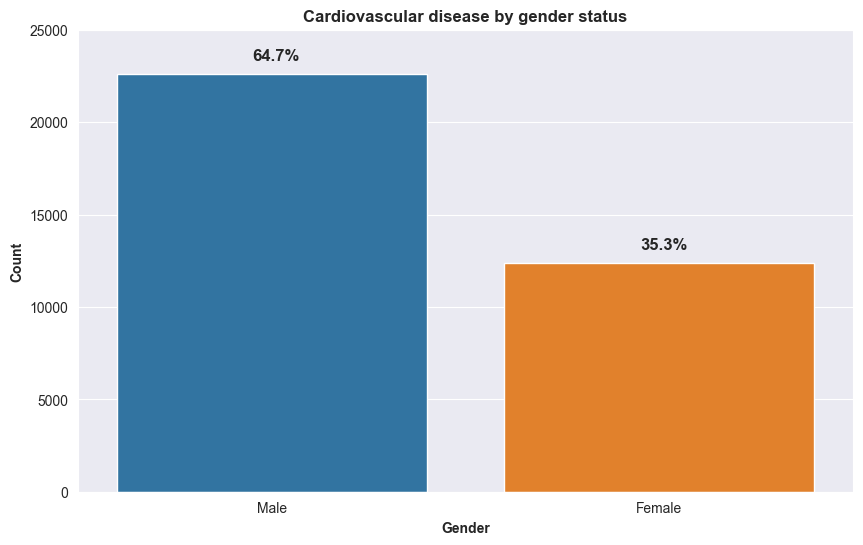

In [36]:
sns.set_style('darkgrid')

fig_q2, ax_q2 = plt.subplots(figsize=(10, 6))
sns.countplot(x='gender',data=df_gender_cardio1)
ax_q2.set_title('Cardiovascular disease by gender status',fontweight='bold')
ax_q2.set_xlabel('Gender',fontweight='bold')
ax_q2.set_ylabel('Count',fontweight='bold')
ax_q2.set_xticklabels(['Male', 'Female'])
ax_q2.set_ylim(0, 25000)
for p in ax_q2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df_smoke_cardio1))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + 750
    ax_q2.annotate(percentage, (x, y), size = 12, fontweight='bold')
    
plt.show()

In [37]:
df_gender_cardio1['gender'].value_counts(normalize=True)

gender
1    0.646559
2    0.353441
Name: proportion, dtype: float64

$Z=\dfrac{\hat{p}-p}{\sqrt{\frac{pq}{n}}}$

In [38]:
p_hat_q3 = (df_gender_cardio1['gender']==1).mean()
p_hat_q3

0.6465593641899425

In [39]:
p_0_q3 = 0.60

In [40]:
n_q3 = len(df_gender_cardio1)
print(n_q3)

34979


In [41]:
numerator_q3 = p_hat_q3 - p_0_q3
denominator_q3 = np.sqrt(p_0_q3 * (1 - p_0_q3) / n_q3)
z_score_q3 = numerator_q3 / denominator_q3
z_score_q3

17.77481604683769

In [42]:
p_values_q3 = norm.cdf(z_score_q3,loc=0,scale=1)
p_values_q3

1.0

In [43]:
alpha_q3 = 0.05

In [44]:
p_values_q3 > alpha_q3

True

left-tailed test <br>
If $p > \alpha,$ we fail to reject $H_0:$

คนที่เป็นโรคหัวใจและหลอดเลือดมากกว่าเท่ากับร้อยละ 60 เป็นผู้ชาย ที่ระดับนัยสำคัญ 0.05

## Conclusion
- คนที่เป็นโรคหัวใจและหลอดเลือดมีอายุเฉลี่ยน้อยกว่า 60 ปี ที่ระดับนัยสำคัญ 0.05
- คนที่เป็นโรคหัวใจและหลอดเลือดน้อยกว่าร้อยละ 60 สูบบุหรี่ ที่ระดับนัยสำคัญ 0.05
- คนที่เป็นโรคหัวใจและหลอดเลือดมากกว่าเท่ากับร้อยละ 60 เป็นผู้ชาย ที่ระดับนัยสำคัญ 0.05